In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the preprocessed data
df = pd.read_csv("../data/eda_preprocessed_data.csv")

### K-Means Model

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# before building model best to find K value
# finding best K using Elbow method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

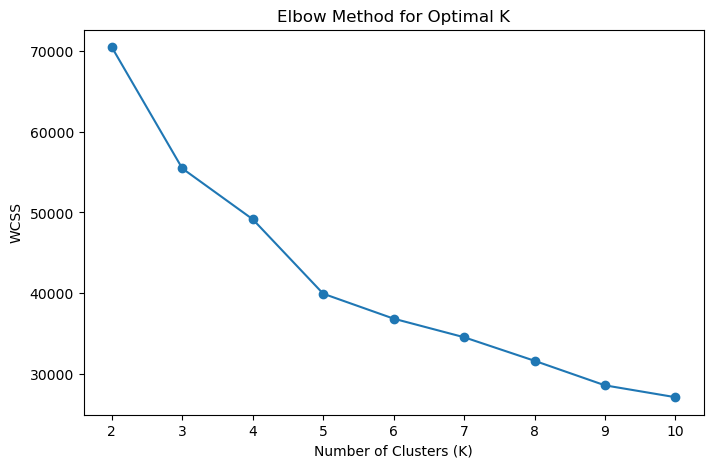

In [5]:
# Elbow curve to detect k value
plt.figure(figsize=(8,5))
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [6]:
# from the above curve taking k=4
# build Kmeans model using k=4
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(df)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [7]:
# adding cluster labels to df
kmeans_labels = kmeans_model.fit_predict(df)
df['Kmeans_cluster'] = kmeans_labels

In [8]:
# just to see how countries are distributed among clusters
df['Kmeans_cluster'].value_counts()

Kmeans_cluster
3    1175
0    1024
2     300
1     205
Name: count, dtype: int64

In [9]:
# visualizing the cluster using PCA
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('Kmeans_cluster', axis=1))
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

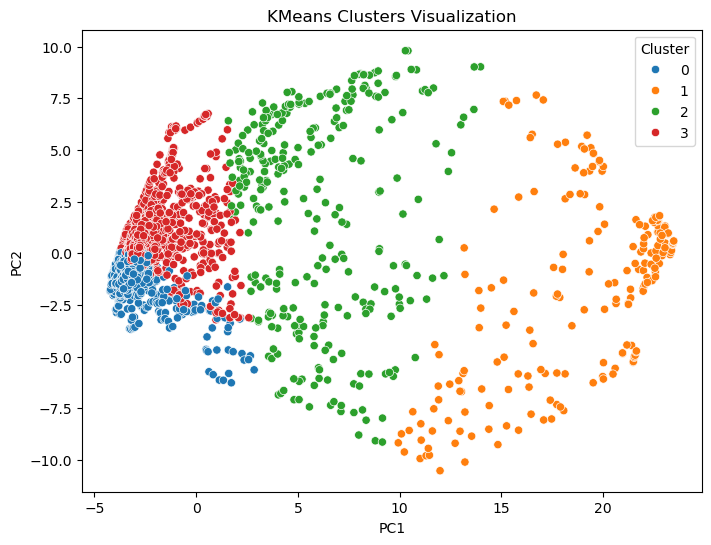

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10')
plt.title("KMeans Clusters Visualization")
plt.show()

In [12]:
# interpret the clusters
cluster_profile = df.groupby('Kmeans_cluster').mean()
cluster_profile

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Kmeans_cluster,,,,,,,,,,,,,,,,,,,,
0,0.791131,0.104353,1.076001,-0.060249,0.011675,-0.133754,-0.229572,0.979317,-0.156250,0.765113,-0.961635,-0.898438,-0.364397,0.564875,-0.770372,-0.218337,0.580559,-0.444016,-0.110952,-0.092644
1,-0.374462,8.248167,0.109542,10.934593,10.672747,0.582578,3.718208,-0.206754,0.878049,-0.480796,0.293031,0.391057,0.390244,-0.505432,0.254359,0.943318,3.801604,0.417773,5.587244,10.042167
2,-0.326078,3.084928,-0.223392,3.074876,3.364010,0.455833,3.195003,-0.187607,0.891667,-0.332945,0.215476,0.300833,0.584286,-0.474432,0.239815,0.882817,1.219263,0.421272,3.621541,4.951345
3,-0.207559,0.318259,-0.060321,-0.029947,0.222582,0.056930,0.851108,-0.126350,0.495957,-0.084016,0.146140,0.185035,0.306018,-0.248251,0.175654,0.425424,0.002966,0.220603,0.334999,0.239933


#### insights from above table

Cluster with high GDP, life expectancy - Developed

Cluster with high birth rate, infant mortality - Underdeveloped

Others - Developing / Emerging

### Agglomerative Clustering Model

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

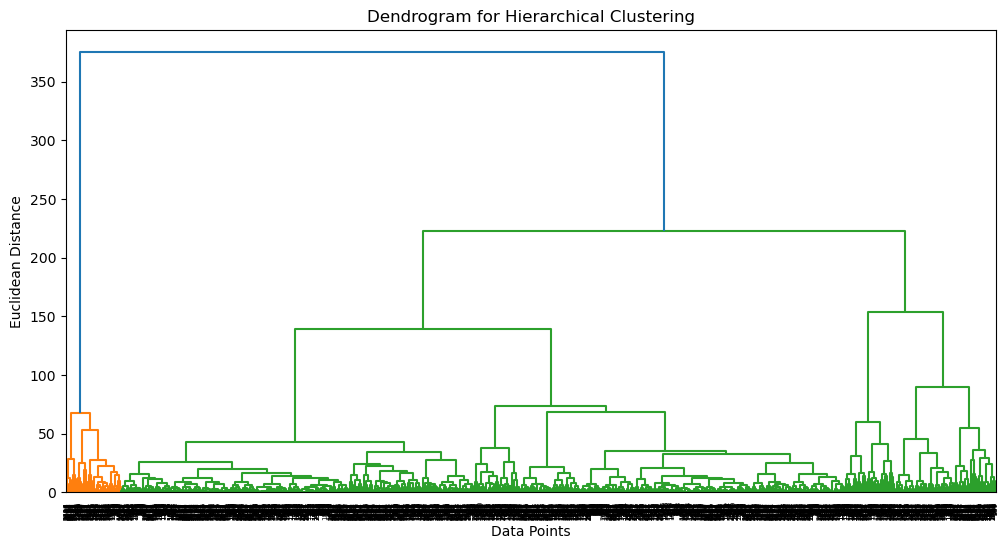

In [14]:
# plot dendrogram to find number of clusters

# Create linkage matrix using Ward method
linkage_matrix = linkage(df, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

##### Dendrogram shows where large vertical jumps occur - helps decide optimal clusters.

In [15]:
# cutting dendrogram at euclidean distance of 175 and getting 3 clusters
# Bild Agglomerative model 

ag_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
ag_model.fit(df)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [16]:
# add cluster labels to df 
ag_labels = ag_model.fit_predict(df)
df['AG_Cluster'] = ag_labels

In [17]:
# finding values distributed among the clusters
df['AG_Cluster'].value_counts()

AG_Cluster
2    2103
0     440
1     161
Name: count, dtype: int64

In [18]:
# visualizing the cluster using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('AG_Cluster', axis=1))
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = ag_labels

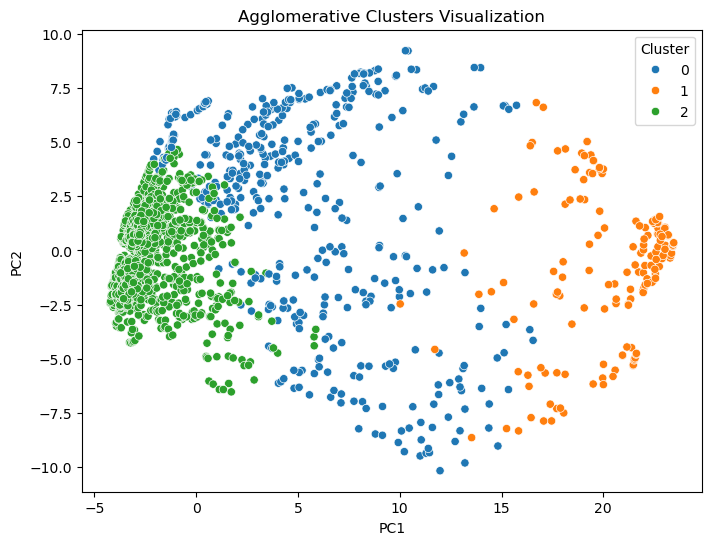

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10')
plt.title("Agglomerative Clusters Visualization")
plt.show()

In [20]:
# interpret the clusters
cluster_profile = df.groupby('AG_Cluster').mean()
cluster_profile

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Kmeans_cluster
AG_Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.316043,3.116162,-0.136045,3.047102,2.990335,0.338149,3.470971,-0.234091,0.890909,-0.333451,...,0.339015,0.516883,-0.417414,0.227031,0.767638,1.117306,0.499253,2.917247,4.163944,2.138636
1,-0.447570,7.959148,-0.104173,11.117584,11.834834,0.792369,4.482119,-0.283962,1.032609,-0.658506,...,0.492754,0.487134,-0.597331,0.277461,1.130172,3.760575,0.449014,6.364310,11.181899,1.006211
2,0.286621,0.211426,0.505477,-0.030187,0.118616,-0.042915,0.112627,0.430057,0.148359,0.351426,...,-0.361706,-0.030501,0.152462,-0.286707,0.102141,0.307189,-0.130956,0.096820,0.046924,1.534475


In [21]:
from sklearn.metrics import silhouette_score
aglomerative_score = silhouette_score(df, ag_labels)
aglomerative_score

0.48502707036840587

#### Insights

One cluster - High GDP, life expectancy (Developed)

One cluster - High birth rate, infant mortality (Underdeveloped)

Others - Developing / Emerging

### DBSCAN Model

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
# before buildng model deciding the eps redius and min_samples
# eps we use default as 0.5 and clculating min samples
min_samples = 2 * df.shape[1]
min_samples

44

In [24]:
# Build DBSCAN Model
dbscan_model = DBSCAN(eps=3, min_samples=min_samples)
dbscan_model.fit(df)

,eps,3
,min_samples,44
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [25]:
# adding cluster labels
dbscan_labels = dbscan_model.fit_predict(df)
df['DBSCAN_Cluster'] = dbscan_labels

In [26]:
# finding values distributed among the clusters
df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 1    1062
 0     988
-1     555
 2      55
 3      44
Name: count, dtype: int64

In [27]:
# visualizing the cluster using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('DBSCAN_Cluster', axis=1))
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = dbscan_labels

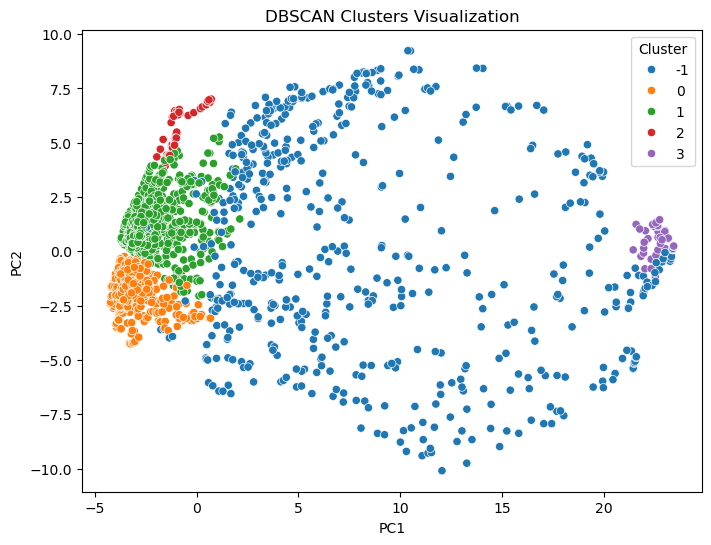

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10')
plt.title("DBSCAN Clusters Visualization")
plt.show()

with eps=0.5, it formed all the data as noise 

with eps= 1.5, created 2 cluster with much noise

with eps=2, created 4 cluster with much noise

with eps=3, created 4 cluster with much noise

### Gussian Mixture Model

In [29]:
from sklearn.mixture import GaussianMixture

In [30]:
# using AIC/BIC curve deciding the n-components  
aic = []
bic = []
components = range(2, 11)

for n in components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df)
    aic.append(gmm.aic(df))
    bic.append(gmm.bic(df))

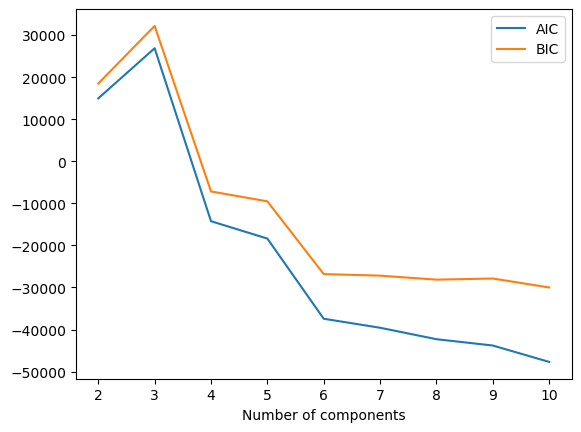

In [31]:
# ploting the curve and deciding where BIC is minimum taking that as n-components
plt.plot(components, aic, label='AIC')
plt.plot(components, bic, label='BIC')
plt.xlabel('Number of components')
plt.legend()
plt.show()

Taking n_components as 4.

In [32]:
# Build GMM model
gmm_model = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm_model.fit(df)

,n_components,4
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [33]:
# Adding cluster labels
gmm_labels = gmm_model.fit_predict(df)
df['GMM_Cluster'] = gmm_labels

In [34]:
# finding values distributed among the clusters
df['GMM_Cluster'].value_counts()

GMM_Cluster
3    1117
0     988
2     400
1     199
Name: count, dtype: int64

In [35]:
# visualizing the cluster using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('GMM_Cluster', axis=1))
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = gmm_labels

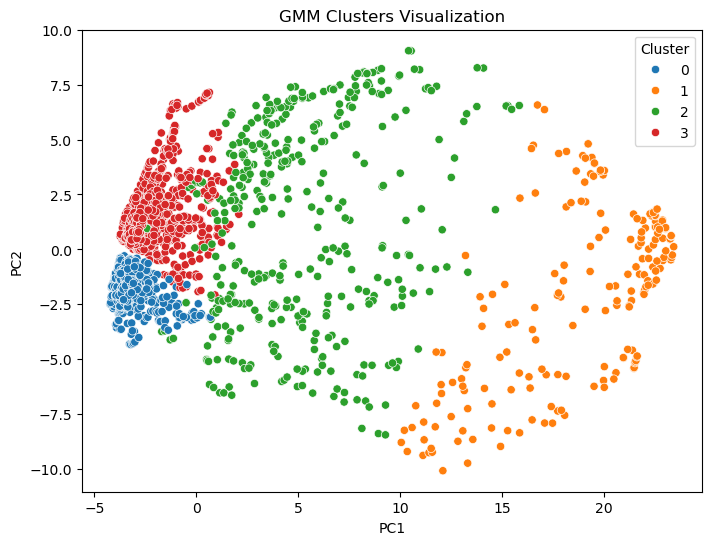

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10')
plt.title("GMM Clusters Visualization")
plt.show()

### K-Medoids Model

In [37]:
from sklearn_extra.cluster import KMedoids

In [38]:
# using the same n_clusters from the abvoe elbow method used for K-Means 
# Build the K-Medoids model
kmedoids_model = KMedoids(n_clusters=4, random_state=42, method='pam')
kmedoids_model.fit(df)

,n_clusters,4
,metric,'euclidean'
,method,'pam'
,init,'heuristic'
,max_iter,300
,random_state,42


In [39]:
# Adding cluster labels
kmedoids_labels = kmedoids_model.fit_predict(df)
df['kmedoids_Cluster'] = kmedoids_labels

In [40]:
# finding values distributed among the clusters
df['kmedoids_Cluster'].value_counts()

kmedoids_Cluster
1    1098
2    1025
3     385
0     196
Name: count, dtype: int64

In [41]:
# visualizing the cluster using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('kmedoids_Cluster', axis=1))
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmedoids_labels

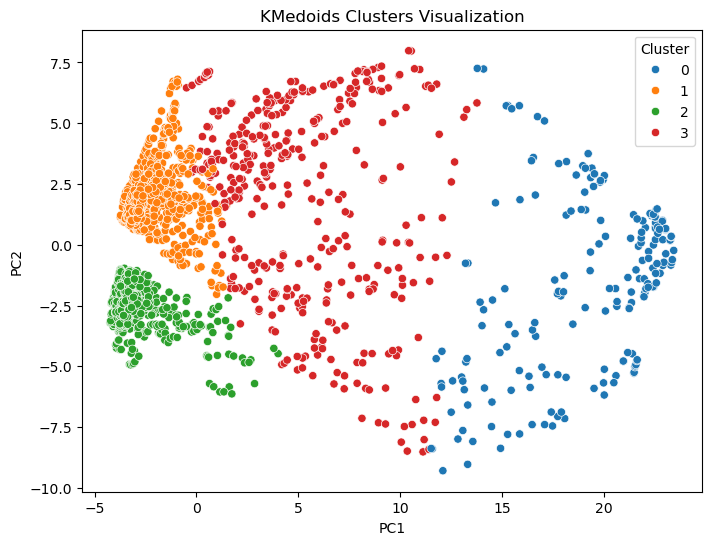

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10')
plt.title("KMedoids Clusters Visualization")
plt.show()

In [43]:
# convert to use for evaluation
df.to_csv("../data/model.csv", index=False)